# LAB3 PROGRAM USING L1 AND L2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Extract features and labels
x_train = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values
x_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values



Epoch 1/10
1875/1875 - 30s - 16ms/step - accuracy: 0.9285 - loss: 0.2431 - val_accuracy: 0.9620 - val_loss: 0.1245
Epoch 2/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9692 - loss: 0.1014 - val_accuracy: 0.9671 - val_loss: 0.1059
Epoch 3/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9772 - loss: 0.0715 - val_accuracy: 0.9733 - val_loss: 0.0885
Epoch 4/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9819 - loss: 0.0556 - val_accuracy: 0.9740 - val_loss: 0.0778
Epoch 5/10
1875/1875 - 25s - 14ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 6/10
1875/1875 - 18s - 9ms/step - accuracy: 0.9884 - loss: 0.0354 - val_accuracy: 0.9772 - val_loss: 0.0858
Epoch 7/10
1875/1875 - 27s - 14ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9749 - val_loss: 0.0945
Epoch 8/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9780 - val_loss: 0.0833
Epoch 9/10
1875/1875 - 26s - 14ms/step - accuracy: 0.9919 - loss: 0.0229 - val_ac

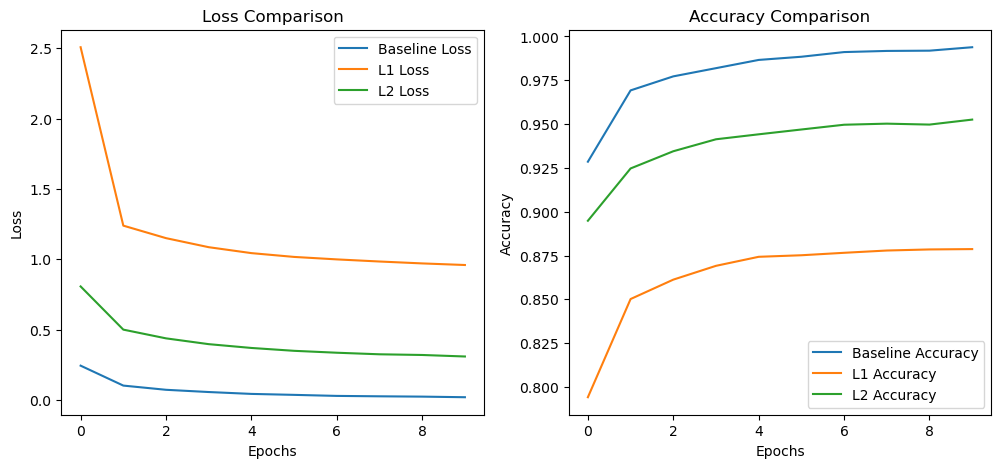

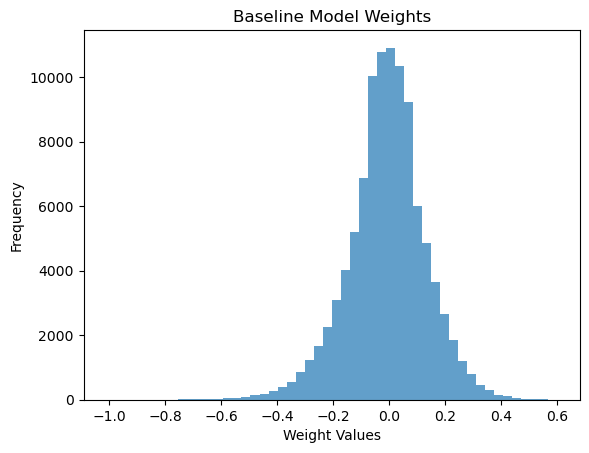

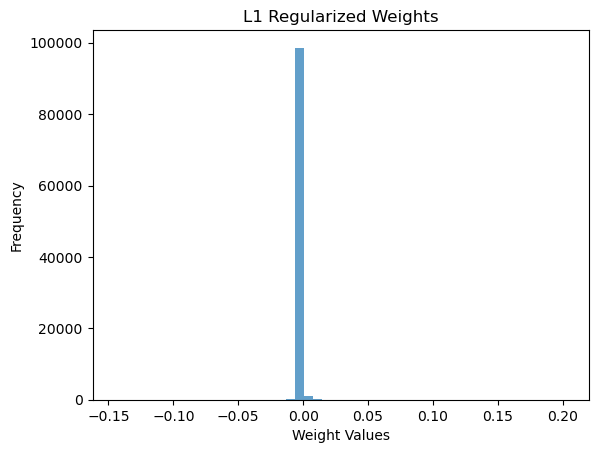

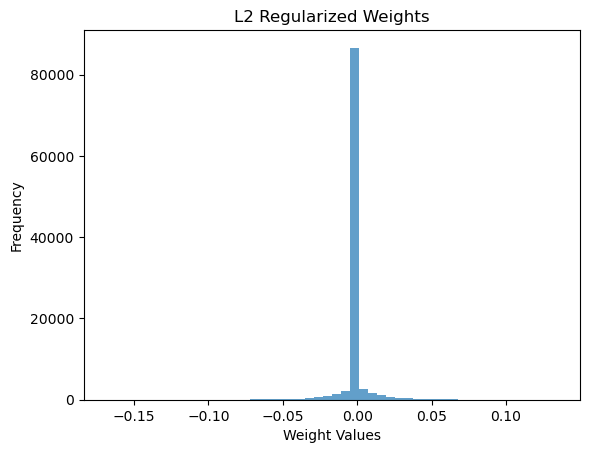

In [3]:
# Flatten input
x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)

# Define function to build models
def build_model(regularizer=None):
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train baseline model (No Regularization)
baseline_model = build_model()
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Train L1 Regularized Model
l1_model = build_model(keras.regularizers.l1(0.01))
l1_history = l1_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Train L2 Regularized Model
l2_model = build_model(keras.regularizers.l2(0.01))
l2_history = l2_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Baseline Loss')
plt.plot(l1_history.history['loss'], label='L1 Loss')
plt.plot(l2_history.history['loss'], label='L2 Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Baseline Accuracy')
plt.plot(l1_history.history['accuracy'], label='L1 Accuracy')
plt.plot(l2_history.history['accuracy'], label='L2 Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Weight distribution visualization
def plot_weights(model, title):
    weights = model.get_weights()[0].flatten()
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.show()

plot_weights(baseline_model, "Baseline Model Weights")
plot_weights(l1_model, "L1 Regularized Weights")
plot_weights(l2_model, "L2 Regularized Weights")
